# Assignment 4

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Removes default white gridlines from the plot:
plt.rcParams["axes.grid"] = False

In [181]:
import pandas as pd
import wikipedia as wp

# Montreal Canadians
# https://en.wikipedia.org/wiki/List_of_Montreal_Canadiens_seasons
html_mc = wp.page("List_of_Montreal_Canadiens_seasons").html() #.encode("UTF-8")
mon = pd.read_html(html_mc)[4]

# Toronto Maple Leafs
# https://en.wikipedia.org/wiki/List_of_Toronto_Maple_Leafs_seasons
html_to = wp.page("List_of_Toronto_Maple_Leafs_seasons").html() #.encode("UTF-8")
tor = pd.read_html(html_to)[2]

# Ottawa Senators
# https://en.wikipedia.org/wiki/List_of_Ottawa_Senators_seasons
html_os = wp.page("List_of_Ottawa_Senators_seasons").html() #.encode("UTF-8")
ott = pd.read_html(html_os)[1]


In [182]:
mon.columns = mon.columns.droplevel(0)
mon = mon.loc[25:51,].reset_index(drop=True)
mon = mon.iloc[:, 0:13]
mon = mon[['NHL season',
 'GP',
 'W',
 'L',
 'T',
 'OT',
 'GF',
 'GA',
 'Pts']]
mon.head(2)

In [184]:
mon.shape

(27, 9)

In [185]:
tor.columns = tor.columns.droplevel(0)
tor = tor.loc[79:105,].reset_index(drop=True)
tor = tor.iloc[:, 0:13]
tor = tor[['NHL season',
 'GP',
 'W',
 'L',
 'T',
 'OT[a]',
 'GF',
 'GA',
 'Pts']]
tor.head(2)

In [186]:
tor.shape

(27, 9)

In [188]:
ott.columns = ott.iloc[0]
ott.drop(ott.index[0], inplace=True)
ott.reset_index(drop=True, inplace=True)
ott = ott.loc[:26,]
ott = ott[['Season',
 'GP',
 'W',
 'L',
 'T',
 'OTL',
 'GF',
 'GA',
 'Pts']]
ott.head(2)

,Season,Team,GP,W,L,T,OTL,Pts,GF,GA,PIM,Finish,Playoffs
1,1992–93,1992–93,84,10,70,4,—,24,202,395,1716,"6th, Adams",Did not qualify
2,1993–94,1993–94,84,14,61,9,—,37,201,397,1710,"7th, Northeast",Did not qualify


In [199]:
ott.shape

(27, 9)

In [204]:
ott["W"] = pd.to_numeric(ott["W"], errors='coerce')
mon["W"] = pd.to_numeric(mon["W"], errors='coerce')
tor["W"] = pd.to_numeric(tor["W"], errors='coerce')

/home/atai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [331]:
ott["L"] = pd.to_numeric(ott["L"], errors='coerce')
mon["L"] = pd.to_numeric(mon["L"], errors='coerce')
tor["L"] = pd.to_numeric(tor["L"], errors='coerce')

/home/atai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [354]:
ott["GF"] = pd.to_numeric(ott["GF"], errors='coerce')
mon["GF"] = pd.to_numeric(mon["GF"], errors='coerce')
tor["GF"] = pd.to_numeric(tor["GF"], errors='coerce')
ott["GA"] = pd.to_numeric(ott["GA"], errors='coerce')
mon["GA"] = pd.to_numeric(mon["GA"], errors='coerce')
tor["GA"] = pd.to_numeric(tor["GA"], errors='coerce')

/home/atai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/atai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [356]:
ott["GD"]=ott["GF"] -ott["GA"]
mon["GD"]=mon["GF"] -mon["GA"]
tor["GD"]=tor["GF"] -tor["GA"]

/home/atai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


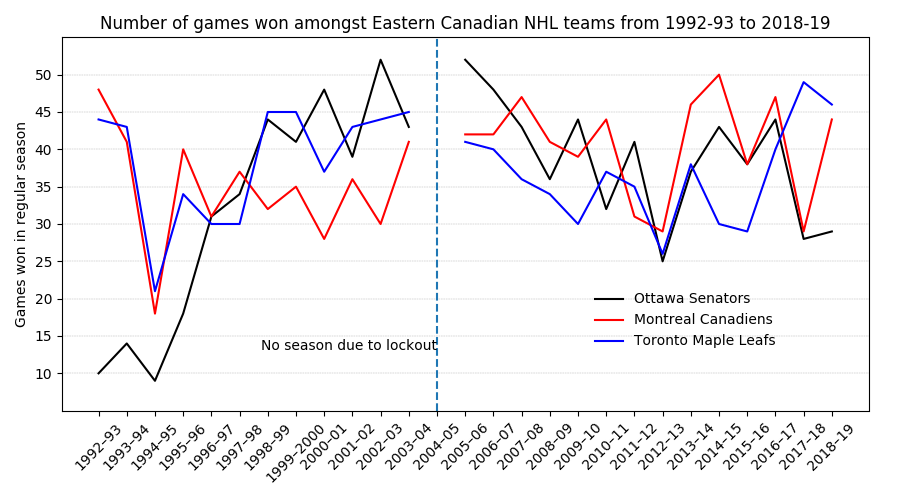

In [328]:
# fig, ax1 = plt.subplots()
t_ = ott["Season"].str.replace(r'[^0-9\–]', "")

plt.figure(figsize=(9,5))

plt.plot(t_,ott['W'], color="black", label="Ottawa Senators")
plt.plot(t_,mon['W'], color="red", label="Montreal Canadiens")
plt.plot(t_,tor['W'], color="blue", label="Toronto Maple Leafs")


plt.gca().set_ylim(ymin=5, ymax=55)
plt.yticks(np.arange(min(ott['W'])+1, max(ott['W'])+1, 5.0))

plt.xticks(rotation=45)
plt.title('Number of games won amongst Eastern Canadian NHL teams from 1992-93 to 2018-19')
plt.ylabel('Games won in regular season')

plt.tight_layout()


plt.legend(bbox_to_anchor=(0.90,0.35), frameon = False, shadow = False)

plt.axvline(x="2004–05", linestyle="dashed")
plt.figtext(.29, .3, "No season due to lockout")



plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')



<IPython.core.display.Javascript object>


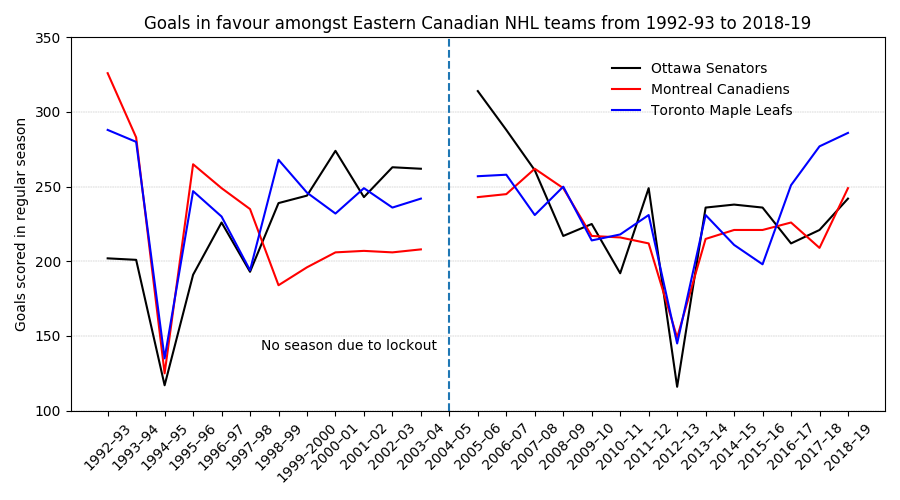

In [353]:
t_ = ott["Season"].str.replace(r'[^0-9\–]', "")

plt.figure(figsize=(9,5))

plt.plot(t_,ott['GF'], color="black", label="Ottawa Senators")
plt.plot(t_,mon['GF'], color="red", label="Montreal Canadiens")
plt.plot(t_,tor['GF'], color="blue", label="Toronto Maple Leafs")


plt.gca().set_ylim(ymin=100, ymax=350)

plt.xticks(rotation=45)
plt.title('Goals in favour amongst Eastern Canadian NHL teams from 1992-93 to 2018-19')
plt.ylabel('Goals scored in regular season')

plt.tight_layout()


plt.legend(bbox_to_anchor=(0.65,0.75), frameon = False, shadow = False)

plt.axvline(x="2004–05", linestyle="dashed")
plt.figtext(.29, .3, "No season due to lockout")



plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')

<IPython.core.display.Javascript object>


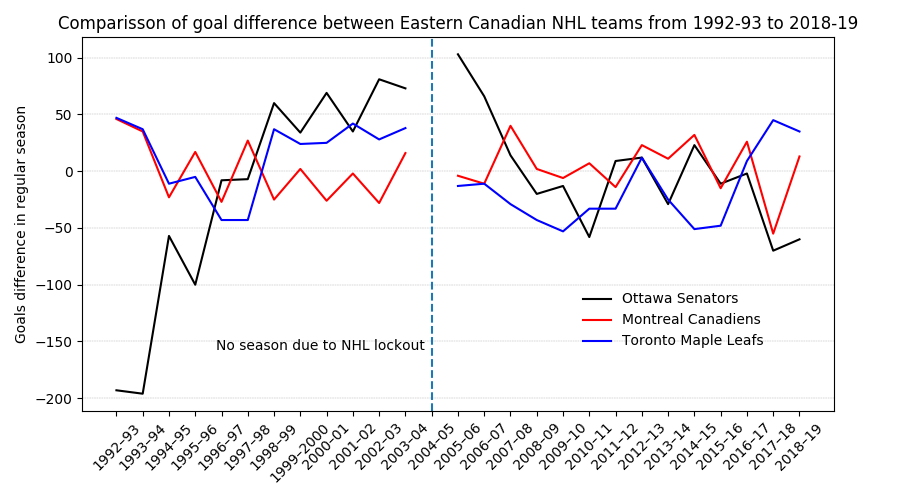

In [372]:
t_ = ott["Season"].str.replace(r'[^0-9\–]', "")

plt.figure(figsize=(9,5))

plt.plot(t_,ott['GD'], color="black", label="Ottawa Senators")
plt.plot(t_,mon['GD'], color="red", label="Montreal Canadiens")
plt.plot(t_,tor['GD'], color="blue", label="Toronto Maple Leafs")


# plt.gca().set_ylim(ymin=100, ymax=350)

plt.xticks(rotation=45)
plt.title('Comparisson of goal difference between Eastern Canadian NHL teams from 1992-93 to 2018-19')
plt.ylabel('Goals difference in regular season')

plt.tight_layout()


plt.legend(bbox_to_anchor=(0.65,0.35), frameon = False, shadow = False)

plt.axvline(x="2004–05", linestyle="dashed")
# plt.axhline(y=0, color= "green")

plt.figtext(.24, .3, "No season due to NHL lockout")



plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')

In [ ]:
# t_ = ott["Season"].str.replace(r'[^0-9\–]', "")
# t_ = ott["Season"].str.extract('(\d+)', expand=False)
# t_ = ott["Season"].str.replace(r'[a-zA-Z]', "")
# t_ = ott["Season"].str.replace(r'[^0-9]+', "")


- Region: Ottawa, Montreal and Toronto
- Which Eastern Canadian NHL team has had the best goal difference in the past 28 years?
- In the past 28 years, what has been the goal difference between the Eastern Canadian NHL teams? 

1993 Montreal Canadiens champion
2007 Ottawa Senators eastern champion

Goal difference is an important figure that compares the performance of the offensive and defensive lines of a team. In Hockey as well as in other sports like soccer, football, basketball, rugby; there is an ongoing debate whether an offensive or defensive team has more wining probability.

My analysis shows the "goal difference" between the Eastern Canadian NHL teams (Ottawa Senators, Montreal Canadiens and Toronto Maple Leafs) during the regular season for the last 28 years. The plot shows the Cairo's principles of data visualization:

Truthfulness, 
The data is presented as encountered in the Wikipedia source. It also includes a break in the season 2003-04 that was due to the NHL lockout.

Functionality, 
The data-ink ratio helps increasing the functionality of the visualization as the colors represent the 3 different NHL teams.

Beauty, 
The data is color coded and the plot includes a grid that facilitates the user to verify the exact goal difference for a given season.

Insightfulness
The plot displays relevant data in a visual format that represents some trends. For example: one can see that after the 2003-04 season lockout the goal difference for the Toronto Maple Leafs was negative except for the 3 last seasons.
